### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

In [2]:
df = pd.read_csv('electriccars.csv')

In [3]:
df.head(2)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"


In [4]:
df.shape

(180, 11)

In [5]:
df.isna().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

### Data Cleaning

In [6]:
# extract numeric data
def extract_num(x):
    """
    this function extracts the numeric data from the string 
    and converts the data type to float. 
    It uses a regex to extact intergers and floats.
    """
    return float(re.findall(r"[-+]?\d*\.?\d+|\d+", x)[0])

In [7]:
df['Acceleration'][0]

'7.3 sec'

In [8]:
print(extract_num(df['Acceleration'][0]))
print(type(extract_num(df['Acceleration'][0])))

7.3
<class 'float'>


In [9]:
df['BatteryCapacity'] = df['Subtitle'].apply(extract_num)

In [10]:
# extract brand name from name
df['BrandName'] = df['Name'].apply(lambda x: x.split()[0])

In [11]:
# example
df['Name'][0].split()

['Opel', 'Ampera-e']

In [12]:
df['Name'][0].split()[0]

'Opel'

In [13]:
for col_name in ['Acceleration', 'TopSpeed', 'Range', 'Efficiency']:
    df[col_name] = df[col_name].apply(extract_num)

In [14]:
df.drop(columns=['PriceinUK', 'Subtitle'] , axis=1, inplace=True)

In [15]:
df['PriceinGermany'] = df['PriceinGermany']\
                                           .fillna('-1')\
                                           .apply(lambda x: re.sub(',', '', x))\
                                           .apply(extract_num)\
                                           .replace(-1, np.nan)

In [16]:
FastChargeSpeed=[]
for item in df['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df['FastChargeSpeed']=FastChargeSpeed

In [17]:
df['FastChargeSpeed'] = df['FastChargeSpeed'].replace(0, np.nan)

In [18]:
df.head(2)

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,BatteryCapacity,BrandName
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,42990.0,58.0,Opel
1,Renault Kangoo Maxi ZE 33,22.4,130.0,160.0,194.0,NaN,Front Wheel Drive,5,NaN,31.0,Renault


In [19]:
# datatypes of cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   Acceleration     180 non-null    float64
 2   TopSpeed         180 non-null    float64
 3   Range            180 non-null    float64
 4   Efficiency       180 non-null    float64
 5   FastChargeSpeed  175 non-null    float64
 6   Drive            180 non-null    object 
 7   NumberofSeats    180 non-null    int64  
 8   PriceinGermany   168 non-null    float64
 9   BatteryCapacity  180 non-null    float64
 10  BrandName        180 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 15.6+ KB


In [20]:
# shape of cleaned dataset
df.shape

(180, 11)

In [21]:
 df1 = df.dropna()

In [22]:
df1.shape

(164, 11)

In [23]:
df1.isnull().sum()

Name               0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     0
BatteryCapacity    0
BrandName          0
dtype: int64

In [24]:
df1.head(2)

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,BatteryCapacity,BrandName
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,42990.0,58.0,Opel
2,Nissan Leaf,7.9,144.0,220.0,164.0,230.0,Front Wheel Drive,5,29990.0,36.0,Nissan


In [25]:
cars = df1.drop_duplicates()

In [26]:
cars.shape

(163, 11)

In [27]:
cars.Name = cars.Name.str.strip()

C:\Users\atlab\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
min_value = cars['PriceinGermany'].min()
min_value

20490.0

In [29]:
max_value =cars['PriceinGermany'].max() 
max_value

215000.0

In [30]:
min_value = cars['Range'].min()
min_value

165.0

In [31]:
max_value =cars['Range'].max() 
max_value

970.0

In [32]:
cars_1 = cars.rename(columns = {"Acceleration": "acceleration_in_sec", 
                                "Range": "range_km", 
                                "TopSpeed": "top_speed_km_h",
                                "Efficiency": "efficiency_Wh_km",
                                "FastChargeSpeed": "fast_charge_speed_km_h",
                                "PriceinGermany": "price_in_euros",
                                "BatteryCapacity": "batter_capacity_kWh"
                               })

In [33]:
cars_1

,Name,acceleration_in_sec,top_speed_km_h,range_km,efficiency_Wh_km,fast_charge_speed_km_h,Drive,NumberofSeats,price_in_euros,batter_capacity_kWh,BrandName
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,42990.0,58.0,Opel
2,Nissan Leaf,7.9,144.0,220.0,164.0,230.0,Front Wheel Drive,5,29990.0,36.0,Nissan
4,Porsche Taycan Turbo S,2.8,260.0,390.0,215.0,860.0,All Wheel Drive,4,186336.0,83.7,Porsche
5,Nissan e-NV200 Evalia,14.0,123.0,165.0,218.0,170.0,Front Wheel Drive,7,43433.0,36.0,Nissan
6,Volkswagen ID.3 Pure Performance,8.9,160.0,275.0,164.0,260.0,Rear Wheel Drive,5,31960.0,45.0,Volkswagen
...,...,...,...,...,...,...,...,...,...,...,...
174,Peugeot e-Rifter Long 50 kWh,11.7,135.0,195.0,231.0,260.0,Front Wheel Drive,7,42590.0,45.0,Peugeot
175,MG Marvel R,7.9,200.0,340.0,191.0,390.0,Rear Wheel Drive,5,40000.0,65.0,MG
176,Tesla Model 3 Long Range Dual Motor,4.4,233.0,490.0,155.0,820.0,All Wheel Drive,5,53560.0,76.0,Tesla
178,Audi Q4 e-tron 45 quattro,6.9,180.0,385.0,199.0,470.0,All Wheel Drive,5,50900.0,76.6,Audi


In [34]:
# Price  range with Brand Name 

def top_brands_10(cars_1: pd.DataFrame):
    return(
       cars_1
         .groupby(['BrandName'])['price_in_euros']
         .sum()
         .sort_values(ascending=False)
         .head(10)
         .reset_index()
          )

In [35]:
top_brands_10(cars_1)

,BrandName,price_in_euros
0,Porsche,1279278.0
1,Tesla,1143130.0
2,Audi,1076450.0
3,Mercedes,668936.0
4,BMW,451400.0
5,Peugeot,425220.0
6,Opel,391650.0
7,Hyundai,388850.0
8,Nissan,379273.0
9,Kia,368130.0


In [36]:
#Price range with name of the cars

def top_cars_10(cars_1 : pd.DataFrame) :
    return(
       cars_1
        .groupby(['Name', 'batter_capacity_kWh', 'top_speed_km_h', 'fast_charge_speed_km_h'])['price_in_euros']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
)

In [37]:
top_cars_10(cars_1)

,Name,batter_capacity_kWh,top_speed_km_h,fast_charge_speed_km_h,price_in_euros
0,Tesla Roadster,200.0,410.0,920.0,215000.0
1,Porsche Taycan Turbo S Cross Turismo,83.7,250.0,790.0,187746.0
2,Porsche Taycan Turbo S,83.7,260.0,860.0,186336.0
3,Porsche Taycan Turbo Cross Turismo,83.7,250.0,800.0,154444.0
4,Porsche Taycan Turbo,83.7,260.0,840.0,153016.0
5,Lightyear One,60.0,150.0,540.0,149000.0
6,Lucid Air Grand Touring,110.0,270.0,1380.0,140000.0
7,Audi e-tron GT RS,85.0,250.0,810.0,138200.0
8,Mercedes EQS 580 4MATIC,107.8,210.0,800.0,135529.0
9,Tesla Model S Plaid,90.0,322.0,800.0,126990.0


In [38]:
# Displays the name of the car and it features if we give Price as Input 

def price_range(cars_1: pd.DataFrame, PriceinGermany: int):
    
    data=cars_1.copy()
    
    return(data    
    .query('price_in_euros == @PriceinGermany')
    .filter(['Name','acceleration_in_sec', 'batter_capacity_kWh','top_speed_km_h', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive', 'NumberofSeats'])        
    )

price_range(cars_1, 126990.0)

,Name,acceleration_in_sec,batter_capacity_kWh,top_speed_km_h,fast_charge_speed_km_h,range_km,efficiency_Wh_km,Drive,NumberofSeats
124,Tesla Model S Plaid,2.1,90.0,322.0,800.0,535.0,168.0,All Wheel Drive,5


In [39]:
# Displays the Price and it features if we give name  as Input

def name_of_car(cars_1: pd.DataFrame, Name: str):
    
    data=cars_1.copy()
    
    return(data         
    .query('Name == @Name')  
    .filter(['price_in_euros','batter_capacity_kWh', 'acceleration_in_sec', 'TopSpeed', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive', 'NumberofSeats'])      
    )

name_of_car(cars_1, 'Hyundai Kona Electric 39 kWh')

,price_in_euros,batter_capacity_kWh,acceleration_in_sec,fast_charge_speed_km_h,range_km,efficiency_Wh_km,Drive,NumberofSeats
48,34850.0,39.2,9.9,210.0,250.0,157.0,Front Wheel Drive,5
132,35650.0,39.2,9.9,210.0,250.0,157.0,Front Wheel Drive,5


In [40]:
# To Choose the Price range of a Car from and to 

def price_range(cars_1: pd.DataFrame, from_PriceinGermany: int, to_PriceinGermany: int):
    
    data=cars_1.copy()
    
    return(data    
    .query('price_in_euros >= @from_PriceinGermany & price_in_euros <= @to_PriceinGermany')
    .filter(['Name','batter_capacity_kWh', 'acceleration_in_sec','top_speed_km_h', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive', 'NumberofSeats', 'price_in_euros'])        
          )


price_range(cars_1, 21700,30000)

,Name,batter_capacity_kWh,acceleration_in_sec,top_speed_km_h,fast_charge_speed_km_h,range_km,efficiency_Wh_km,Drive,NumberofSeats,price_in_euros
2,Nissan Leaf,36.0,7.9,144.0,230.0,220.0,164.0,Front Wheel Drive,5,29990.0
13,Sono Sion,47.0,9.0,140.0,310.0,260.0,181.0,Front Wheel Drive,5,25500.0
29,SEAT Mii Electric,32.3,12.3,130.0,170.0,205.0,158.0,Front Wheel Drive,4,24650.0
30,Opel Corsa-e,45.0,8.1,150.0,370.0,275.0,164.0,Front Wheel Drive,5,29000.0
45,Renault Zoe ZE40 R110,41.0,11.4,135.0,230.0,255.0,161.0,Front Wheel Drive,5,29990.0
75,Fiat 500e Hatchback 42 kWh,37.3,9.0,150.0,420.0,250.0,149.0,Front Wheel Drive,4,27560.0
97,Fiat 500e Hatchback 24 kWh,23.8,9.5,135.0,260.0,165.0,144.0,Front Wheel Drive,4,23560.0
98,Fiat 500e 3+1,37.3,9.0,150.0,410.0,245.0,152.0,Front Wheel Drive,4,29560.0


<AxesSubplot:>

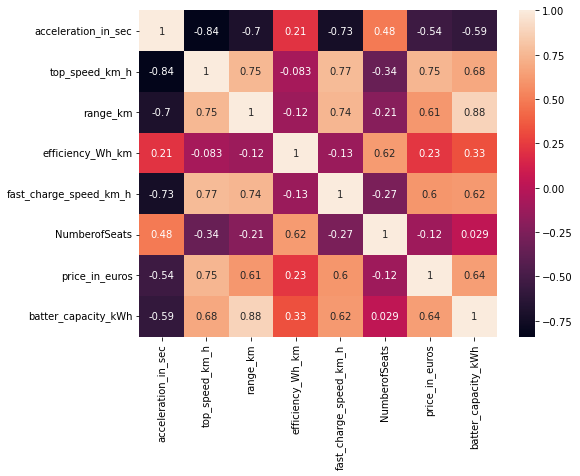

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(cars_1.corr(), annot=True)

In [43]:
mtcars.data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [44]:
def BatteryCapacity(cars_1: pd.DataFrame, from_BatteryCapacity: int, to_BatteryCapacity: int):
    
    data=cars_1.copy()
    
    return(data    
    .query('batter_capacity_kWh >= @from_BatteryCapacity & batter_capacity_kWh <= @to_BatteryCapacity')
    .filter(['Name', 'price_in_euros', 'batter_capacity_kWh', 'acceleration_in_sec','top_speed_km_h', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive', 'NumberofSeats'])        
          )


BatteryCapacity(cars_1, 73,75)

,Name,price_in_euros,batter_capacity_kWh,acceleration_in_sec,top_speed_km_h,fast_charge_speed_km_h,range_km,efficiency_Wh_km,Drive,NumberofSeats
7,BMW iX3,66300.0,74.0,6.8,180.0,520.0,385.0,192.0,Rear Wheel Drive,5
131,Volvo C40 Recharge,62050.0,75.0,4.7,180.0,440.0,340.0,221.0,All Wheel Drive,5
153,Polestar 2 Long Range Single Motor,49500.0,75.0,7.4,160.0,550.0,425.0,176.0,Front Wheel Drive,5
154,Polestar 2 Long Range Dual Motor,52500.0,75.0,4.7,205.0,510.0,395.0,190.0,All Wheel Drive,5
171,Volvo XC40 Recharge Twin Pure Electric,59250.0,75.0,4.9,180.0,440.0,340.0,221.0,All Wheel Drive,5


In [45]:
def range_of_car(cars_1: pd.DataFrame, from_range: int, to_range: int):
    
    data=cars_1.copy()
    
    return(data    
    .query('range_km >= @from_range & range_km <= @to_range')
    .filter(['Name', 'price_in_euros', 'batter_capacity_kWh', 'acceleration_in_sec','top_speed_km_h', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive', 'NumberofSeats'])        
          )


range_of_car(cars_1, 190,200)

,Name,price_in_euros,batter_capacity_kWh,acceleration_in_sec,top_speed_km_h,fast_charge_speed_km_h,range_km,efficiency_Wh_km,Drive,NumberofSeats
173,Peugeot e-Rifter Standard 50 kWh,37590.0,45.0,11.7,135.0,270.0,200.0,225.0,Front Wheel Drive,7
174,Peugeot e-Rifter Long 50 kWh,42590.0,45.0,11.7,135.0,260.0,195.0,231.0,Front Wheel Drive,7


In [46]:
def drive_type(cars_1: pd.DataFrame, Drive: str):
    
    data=cars_1.copy()
    
    return(data         
    .query('Drive == @Drive')  
    .filter(['Name','price_in_euros','batter_capacity_kWh', 'acceleration_in_sec', 'TopSpeed', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive', 'NumberofSeats'])        
    )

drive_type(cars_1,'Front Wheel Drive' )

,Name,price_in_euros,batter_capacity_kWh,acceleration_in_sec,fast_charge_speed_km_h,range_km,efficiency_Wh_km,Drive,NumberofSeats
0,Opel Ampera-e,42990.0,58.0,7.3,210.0,335.0,173.0,Front Wheel Drive,5
2,Nissan Leaf,29990.0,36.0,7.9,230.0,220.0,164.0,Front Wheel Drive,5
5,Nissan e-NV200 Evalia,43433.0,36.0,14.0,170.0,165.0,218.0,Front Wheel Drive,7
8,Nissan Leaf e+,38350.0,56.0,7.3,390.0,325.0,172.0,Front Wheel Drive,5
10,Mercedes EQA 250,47541.0,66.5,8.9,420.0,355.0,187.0,Front Wheel Drive,5
...,...,...,...,...,...,...,...,...,...
165,Toyota PROACE Verso M 75 kWh,64530.0,68.0,13.1,290.0,270.0,252.0,Front Wheel Drive,7
166,Toyota PROACE Verso L 75 kWh,65385.0,68.0,13.1,290.0,270.0,252.0,Front Wheel Drive,7
172,Renault Megane E-Tech Electric,38000.0,60.0,8.0,480.0,335.0,179.0,Front Wheel Drive,5
173,Peugeot e-Rifter Standard 50 kWh,37590.0,45.0,11.7,270.0,200.0,225.0,Front Wheel Drive,7


In [47]:
def number_of_seats(cars_1: pd.DataFrame, NumberofSeats: int):
    
    data=cars_1.copy()
    
    return(data         
    .query('NumberofSeats == @NumberofSeats')  
    .filter(['Name','price_in_euros','batter_capacity_kWh', 'acceleration_in_sec', 'TopSpeed', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive',])        
    )

number_of_seats(cars_1, 5)

,Name,price_in_euros,batter_capacity_kWh,acceleration_in_sec,fast_charge_speed_km_h,range_km,efficiency_Wh_km,Drive
0,Opel Ampera-e,42990.0,58.0,7.3,210.0,335.0,173.0,Front Wheel Drive
2,Nissan Leaf,29990.0,36.0,7.9,230.0,220.0,164.0,Front Wheel Drive
6,Volkswagen ID.3 Pure Performance,31960.0,45.0,8.9,260.0,275.0,164.0,Rear Wheel Drive
7,BMW iX3,66300.0,74.0,6.8,520.0,385.0,192.0,Rear Wheel Drive
8,Nissan Leaf e+,38350.0,56.0,7.3,390.0,325.0,172.0,Front Wheel Drive
...,...,...,...,...,...,...,...,...
172,Renault Megane E-Tech Electric,38000.0,60.0,8.0,480.0,335.0,179.0,Front Wheel Drive
175,MG Marvel R,40000.0,65.0,7.9,390.0,340.0,191.0,Rear Wheel Drive
176,Tesla Model 3 Long Range Dual Motor,53560.0,76.0,4.4,820.0,490.0,155.0,All Wheel Drive
178,Audi Q4 e-tron 45 quattro,50900.0,76.6,6.9,470.0,385.0,199.0,All Wheel Drive


In [48]:
def BatteryCapacity(cars_1: pd.DataFrame, from_BatteryCapacity: int, to_BatteryCapacity: int):
    
    data=cars_1.copy()
    
    return(data    
    .query('batter_capacity_kWh >= @from_BatteryCapacity & batter_capacity_kWh <= @to_BatteryCapacity')
    .filter(['Name', 'price_in_euros', 'batter_capacity_kWh', 'acceleration_in_sec','top_speed_km_h', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive', 'NumberofSeats'])        
          )


      #BatteryCapacity(cars_1, 73,75)

def range_of_car(cars_1: pd.DataFrame, from_range: int, to_range: int):
    
    data=cars_1.copy()
    
    return(data    
    .query('range_km >= @from_range & range_km <= @to_range')
    .filter(['Name', 'price_in_euros', 'batter_capacity_kWh', 'acceleration_in_sec','top_speed_km_h', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive', 'NumberofSeats'])        
          )


    #range_of_car(cars_1, 190,200)

def f3():
    print(BatteryCapacity(cars_1, 73,75),range_of_car(cars_1, 190,200))
   
f3()

                                       Name  price_in_euros  \
7                                   BMW iX3         66300.0   
131                      Volvo C40 Recharge         62050.0   
153      Polestar 2 Long Range Single Motor         49500.0   
154        Polestar 2 Long Range Dual Motor         52500.0   
171  Volvo XC40 Recharge Twin Pure Electric         59250.0   

     batter_capacity_kWh  acceleration_in_sec  top_speed_km_h  \
7                   74.0                  6.8           180.0   
131                 75.0                  4.7           180.0   
153                 75.0                  7.4           160.0   
154                 75.0                  4.7           205.0   
171                 75.0                  4.9           180.0   

     fast_charge_speed_km_h  range_km  efficiency_Wh_km              Drive  \
7                     520.0     385.0             192.0   Rear Wheel Drive   
131                   440.0     340.0             221.0    All Wheel Drive

In [49]:
def diff_features(cars_1: pd.DataFrame, from_BatteryCapacity: int, to_BatteryCapacity: int,from_range: int, to_range: int):
    
    data=cars_1.copy()
    
    return(data    
    .query('batter_capacity_kWh >= @from_BatteryCapacity & batter_capacity_kWh <= @to_BatteryCapacity & range_km >= @from_range & range_km <= @to_range')
    .filter(['Name', 'price_in_euros', 'batter_capacity_kWh', 'acceleration_in_sec','top_speed_km_h', 'fast_charge_speed_km_h', 
             'range_km', 'efficiency_Wh_km', 'Drive', 'NumberofSeats'])        
          )
diff_features(cars_1, 30,60,220,400)   

,Name,price_in_euros,batter_capacity_kWh,acceleration_in_sec,top_speed_km_h,fast_charge_speed_km_h,range_km,efficiency_Wh_km,Drive,NumberofSeats
0,Opel Ampera-e,42990.0,58.0,7.3,150.0,210.0,335.0,173.0,Front Wheel Drive,5
2,Nissan Leaf,29990.0,36.0,7.9,144.0,230.0,220.0,164.0,Front Wheel Drive,5
6,Volkswagen ID.3 Pure Performance,31960.0,45.0,8.9,160.0,260.0,275.0,164.0,Rear Wheel Drive,5
8,Nissan Leaf e+,38350.0,56.0,7.3,157.0,390.0,325.0,172.0,Front Wheel Drive,5
9,BMW i3 120 Ah,39000.0,37.9,7.3,150.0,270.0,235.0,161.0,Rear Wheel Drive,4
11,DS 3 Crossback E-Tense,30040.0,45.0,8.7,150.0,330.0,250.0,180.0,Front Wheel Drive,5
12,BMW i3s 120 Ah,42600.0,37.9,6.9,160.0,260.0,230.0,165.0,Rear Wheel Drive,4
13,Sono Sion,25500.0,47.0,9.0,140.0,310.0,260.0,181.0,Front Wheel Drive,5
16,Renault Zoe ZE50 R110,31990.0,52.0,11.4,135.0,230.0,315.0,165.0,Front Wheel Drive,5
17,Hyundai IONIQ Electric,35350.0,38.3,9.7,165.0,220.0,250.0,153.0,Front Wheel Drive,5


In [50]:
def four_features(cars_1: pd.DataFrame, from_BatteryCapacity: int, to_BatteryCapacity: int,from_range: int, to_range: int, from_acceleration: int, to_acceleration: int, from_topspeed: int, to_topspeed: int, from_PriceinGermany: int, to_PriceinGermany: int, Drive: str, NumberofSeats: int):
    
    data=cars_1.copy()
    
    return(data    
    .query('batter_capacity_kWh >= @from_BatteryCapacity & batter_capacity_kWh <= @to_BatteryCapacity & range_km >= @from_range & range_km <= @to_range & acceleration_in_sec >= @from_acceleration & acceleration_in_sec <= @to_acceleration & top_speed_km_h >= @from_topspeed & top_speed_km_h <= @to_topspeed & price_in_euros >= @from_PriceinGermany & price_in_euros <= @to_PriceinGermany & Drive == @Drive & NumberofSeats == @NumberofSeats')
    .filter(['Name', 'price_in_euros', 'batter_capacity_kWh', 'acceleration_in_sec','top_speed_km_h', 
             'range_km', 'fast_charge_speed_km_h','efficiency_Wh_km', 'Drive', 'NumberofSeats'])        
          )
four_features(cars_1, 30,60,220,400,7,8,140,150,30000,40000, 'Rear Wheel Drive', 4)

,Name,price_in_euros,batter_capacity_kWh,acceleration_in_sec,top_speed_km_h,range_km,fast_charge_speed_km_h,efficiency_Wh_km,Drive,NumberofSeats
9,BMW i3 120 Ah,39000.0,37.9,7.3,150.0,235.0,270.0,161.0,Rear Wheel Drive,4
